$$ \text{EE0404 SIGNAL PROCESSING APPLICATIONS} $$
$$ \ $$
$$ $$
$$ \text{Lecture 5} $$

$$ \text{Analysis of time-varying frequency content}$$

$$ \text{July 2016} $$

# Today...

**Review**
- Generation of Linear Chirp Signal with non-zero initial frequency

**New Topics**

- Analysis of time varying frequency content
- Windowing
- Short-time Fourier Transform 




In [1]:
%pylab inline
from numpy.fft import *
from IPython import display

rcParams['figure.figsize']=(16,9)
rcParams['xtick.labelsize']='large'
rcParams['ytick.labelsize']='large'


Populating the interactive namespace from numpy and matplotlib


# Recall: Linear Chirp

The signal 

$$ x(t) = sin( 20\pi t^2) $$

has a time-varying instantaneous frequency given by

$$ f(t) = \frac {1}{2\pi} \frac{\partial \phi (t)}{\partial t} = 20t$$

The frequency of this signal increases by 20 Hz / second.

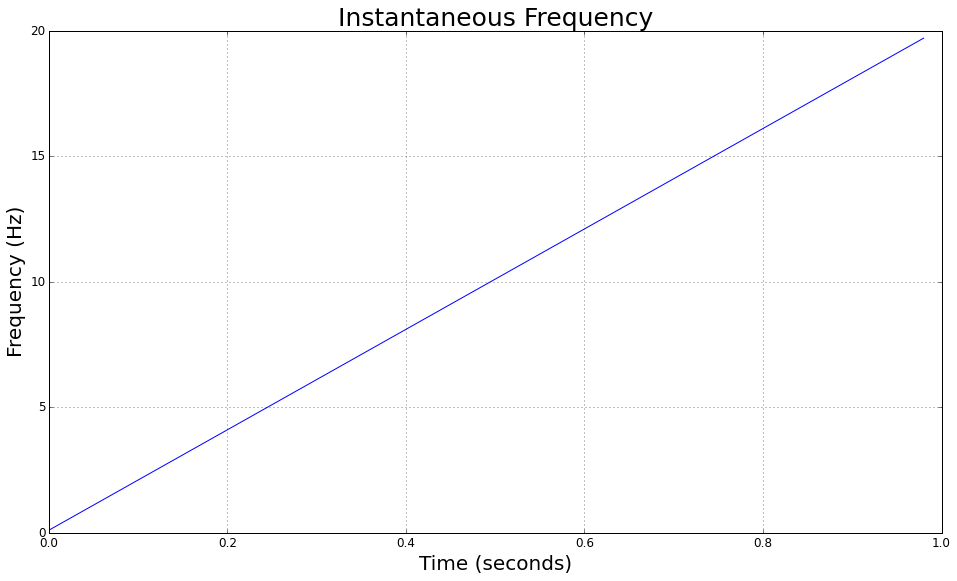

In [2]:
fs=100.0;
n = arange(fs)
t = n/fs
phi = 20*pi*t*t
f = (diff(phi)*fs)/(2*pi)
t2 = t[:-1]

plot(t2,f)
xlabel('Time (seconds)',fontsize=20)
ylabel('Frequency (Hz)',fontsize=20)
grid(True)
title('Instantaneous Frequency',fontsize=25)


## *FFT analysis of whole data*



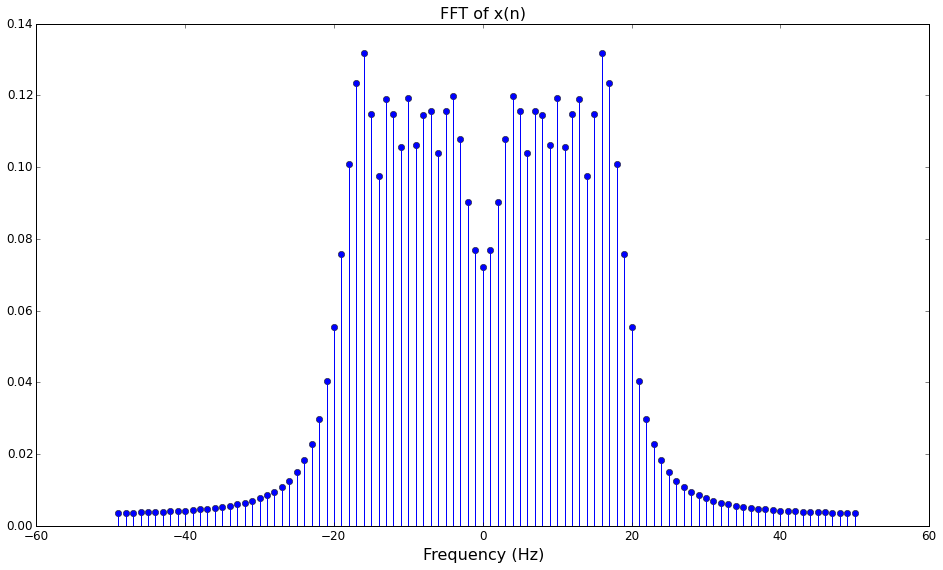

In [3]:
x = sin(phi) # generation of signal
M = 100
k= hstack((arange(0,M/2+1),arange(-(M/2-1),0)))
magfftx = abs(fft(x))/M

stem(k*fs/M,magfftx)
xlabel('Frequency (Hz)',fontsize=16)
title('FFT of x(n)',fontsize=16)


## *Analysis Result*

The fft analysis applied to a time-varying content reveals the frequency content but does not give any information on occurence instants.

# Linear Chirp generation for specific parameters

- What is the formula of the linear chirp signal that has an instant frequency of 5 Hz at t=0 and 25 Hz at t=10 sec?
- Generate and plot instaneous frequency vs. time.



## Solution:

- Since chirp is linear, the instantanteous frequency has the form:

$$ f(t) = K t + b $$ 

where $K$ is the slope of $f(t)$ vs. $t$ line with units Hz / sec. Thus, 

$$ K = \frac{\Delta f}{\Delta t} = \frac{25 - 5}{10-0} = 2\ Hz/sec $$

and by using the initial value

$$ f(0) = b = 5 $$

Thus, the equation of instantaneous frequency is 

$$f(t) = 2t + 5 $$


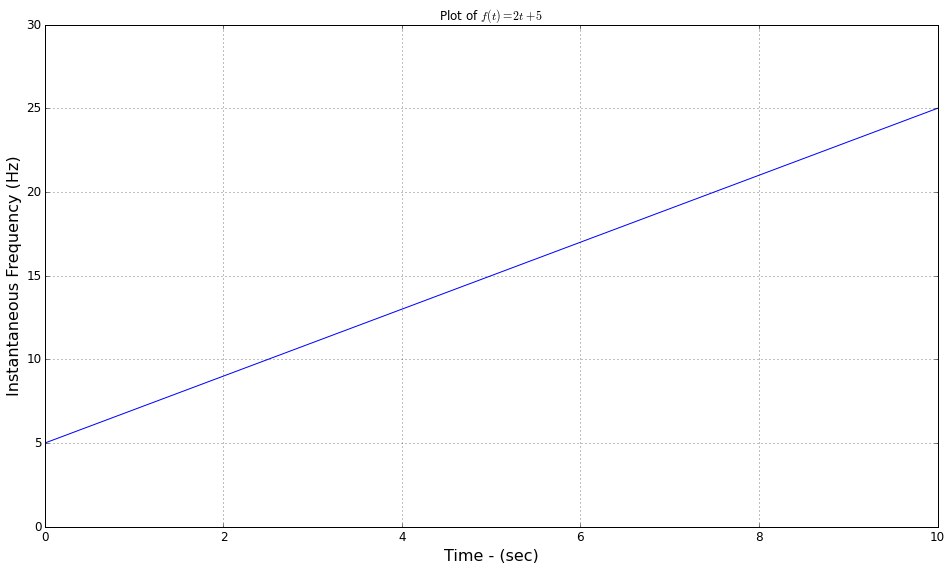

In [4]:
t = arange(11)
f = 2*t+5
plot(t,f)
ylim([0,30])
grid(True)
xlabel('Time - (sec)',fontsize=16)
ylabel('Instantaneous Frequency (Hz)',fontsize=16)
title('Plot of $ f(t) = 2t + 5 $')

- To obtain the phase function:

$$ \phi (t)  = \int 2\pi\ f(t) \,dt $$
$$ \phi (t)  = 2\pi t^2 + 10\pi t $$

- Thus, the linear chirp signal can be obtained by

$$ x(t) = sin(2\pi t^2 + 10\pi t ) $$



Now we will generate and plot the signal for 10 seconds of duration.


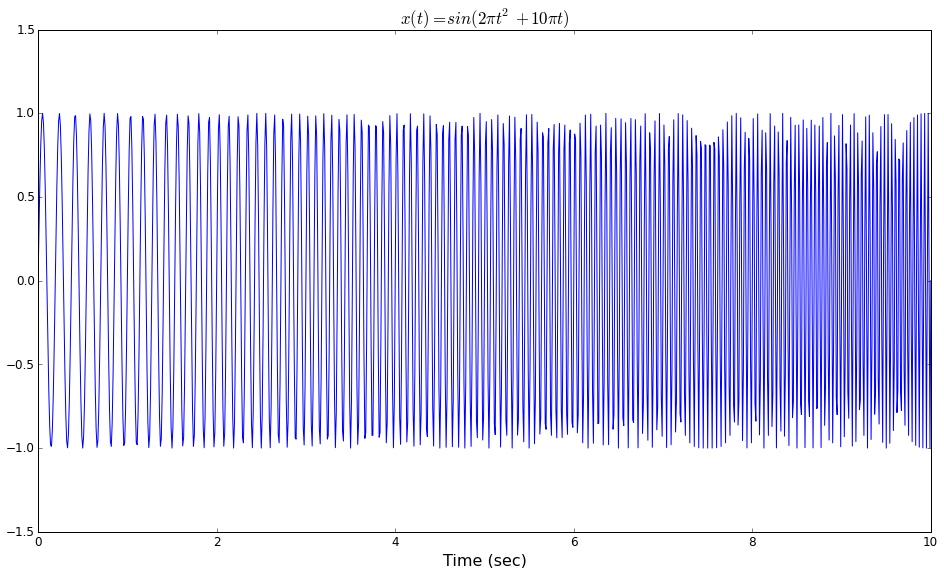

In [5]:
fs = 100.0
t = arange(10*fs+1)/fs # 1001 samples, exactly 10 seconds.

x = sin(2*pi*t*t+10*pi*t)
plot(t,x)
ylim([-1.5, 1.5])
xlabel('Time (sec)',fontsize=16)
title('$ x(t) = sin(2\pi t^2 + 10\pi t )$',fontsize=17)


# Using Grid Subplots

To demonstrate the usage of subplots, we will draw different time segments of the signal above into a common figure. Each segment will be plotted on a **subplot**. 

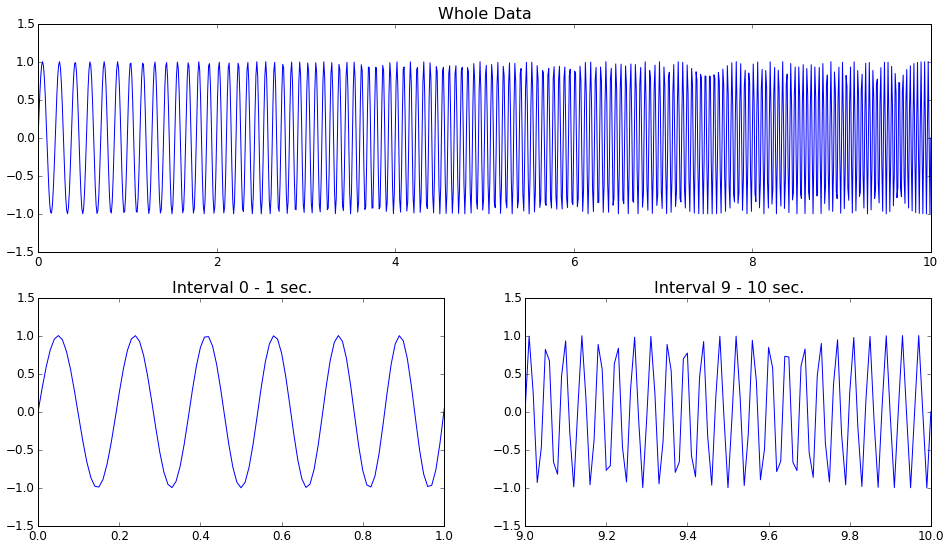

In [6]:
subplot(2,1,1)
plot(t,x)
ylim([-1.5,1.5])
title('Whole Data',fontsize=16)

subplot(2,2,3)
plot(t,x)
xlim([0,1])
ylim([-1.5,1.5])
title('Interval 0 - 1 sec.',fontsize=16)

subplot(2,2,4)
plot(t,x)
xlim([9,10])
ylim([-1.5,1.5])
title('Interval 9 - 10 sec.',fontsize=16)

# Windowing and Spectogram Commmand

- To analyze the time-varying frequency content, the time series may be segmented into smaller data. This process is called **windowing**.
- The data in adjacent windows may have common elements via **overlapping**.
- This second parameter is usualy given in percentage, i.e. 50%  means that half of the latest data in a window will be used as first half of the next data window.
- After windowing, FFT operation is applied to each window. The magnitude colored FFT vectors vs. windows plotting gives the short time Fourier transform of the time series.
- The whole operation chain can be realized via spectogram command (in **scipy module**)

## Example 

Let's analyze previously generated signal $x$ with:
    - 1 seconds of windowing
    - 50 % overlap
 

** Solution **
- Since the windowing size is 1 seconds, we have 1.$f_s$ = 100 samples
- Overlap is 0.5*100 = 50 samples
- The corresponding **specgram()** inputs are:

    - Fs = 100
    - NFFT = 100
    - noverlap = 50

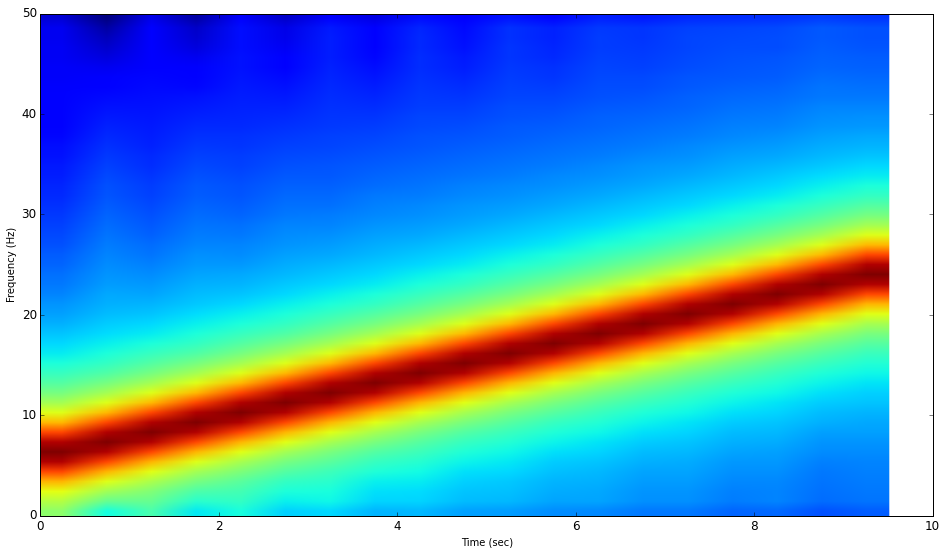

In [11]:
specgram(x, NFFT = 100, noverlap = 50, Fs= 100,window=None);
ylabel('Frequency (Hz)')
xlabel('Time (sec)')